In [2]:
library("ggplot2") #can't use library...

ERROR: Error in library("ggplot2"): there is no package called ‘ggplot2’


In [1]:
dat<-read.csv("Data/boston_corrected_raw.csv")
data1<-dat[,-c(1,6)] #remove TOWN, MEDV
str(data1)

'data.frame':	506 obs. of  18 variables:
 $ TOWNNO : int  0 1 1 2 2 2 3 3 3 3 ...
 $ TRACT  : int  2011 2021 2022 2031 2032 2033 2041 2042 2043 2044 ...
 $ LON    : num  -71 -71 -70.9 -70.9 -70.9 ...
 $ LAT    : num  42.3 42.3 42.3 42.3 42.3 ...
 $ CMEDV  : num  24 21.6 34.7 33.4 36.2 28.7 22.9 22.1 16.5 18.9 ...
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num  397 397 393 395 397 ...
 $ L

In [13]:
#Goal: build model for CMEDV

summary(data1)

     TOWNNO          TRACT           LON              LAT       
 Min.   : 0.00   Min.   :   1   Min.   :-71.29   Min.   :42.03  
 1st Qu.:26.25   1st Qu.:1303   1st Qu.:-71.09   1st Qu.:42.18  
 Median :42.00   Median :3394   Median :-71.05   Median :42.22  
 Mean   :47.53   Mean   :2700   Mean   :-71.06   Mean   :42.22  
 3rd Qu.:78.00   3rd Qu.:3740   3rd Qu.:-71.02   3rd Qu.:42.25  
 Max.   :91.00   Max.   :5082   Max.   :-70.81   Max.   :42.38  
     CMEDV            CRIM                ZN             INDUS      
 Min.   : 5.00   Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46  
 1st Qu.:17.02   1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19  
 Median :21.20   Median : 0.25651   Median :  0.00   Median : 9.69  
 Mean   :22.53   Mean   : 3.61352   Mean   : 11.36   Mean   :11.14  
 3rd Qu.:25.00   3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10  
 Max.   :50.00   Max.   :88.97620   Max.   :100.00   Max.   :27.74  
      CHAS              NOX               RM             AGE  

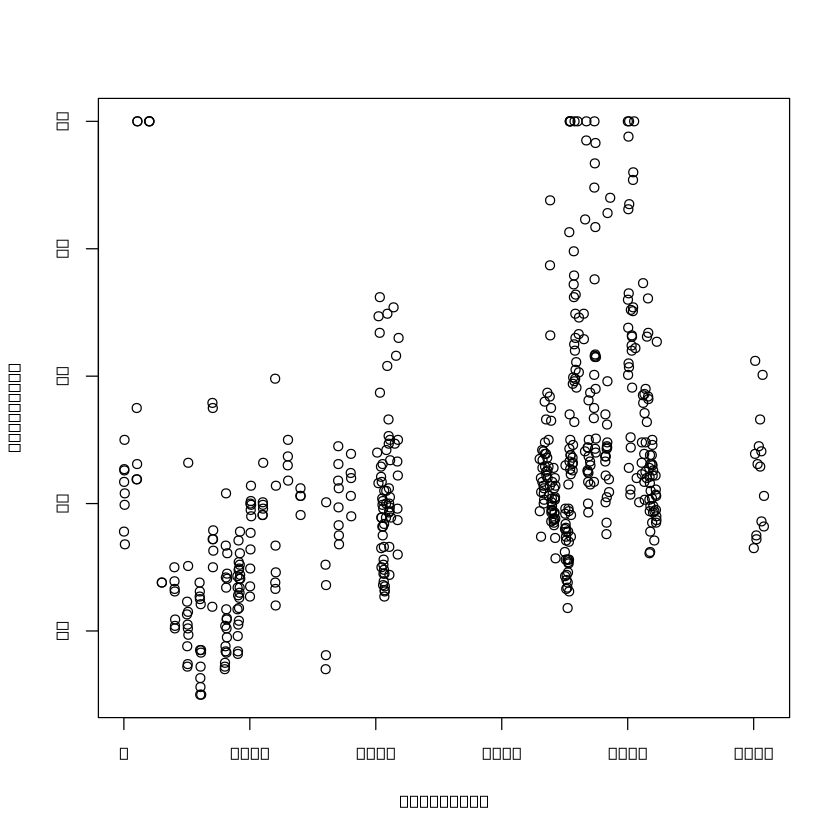

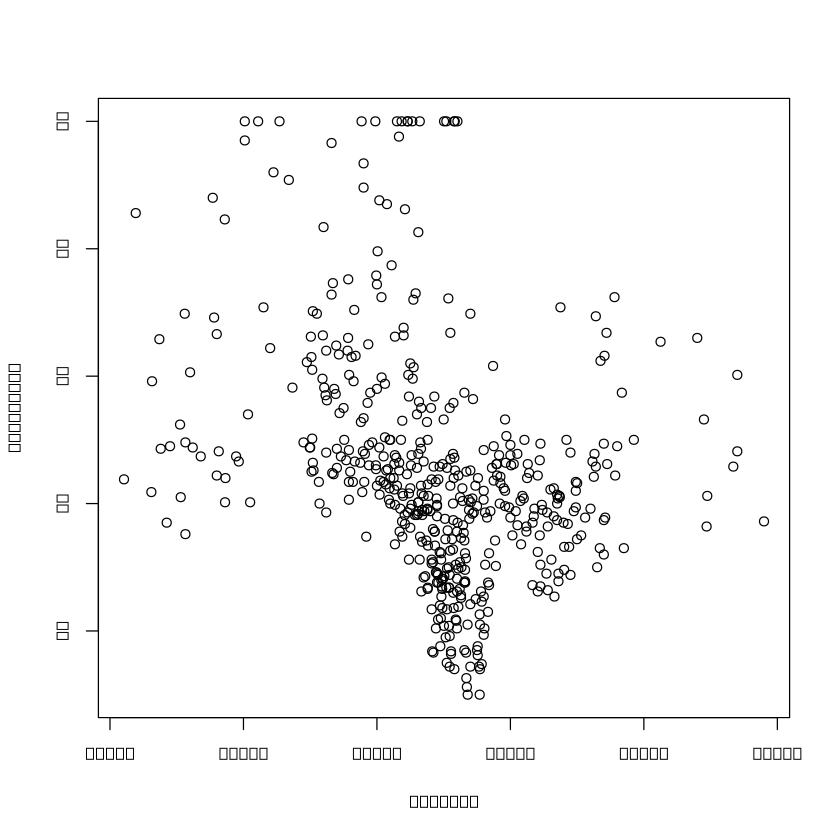

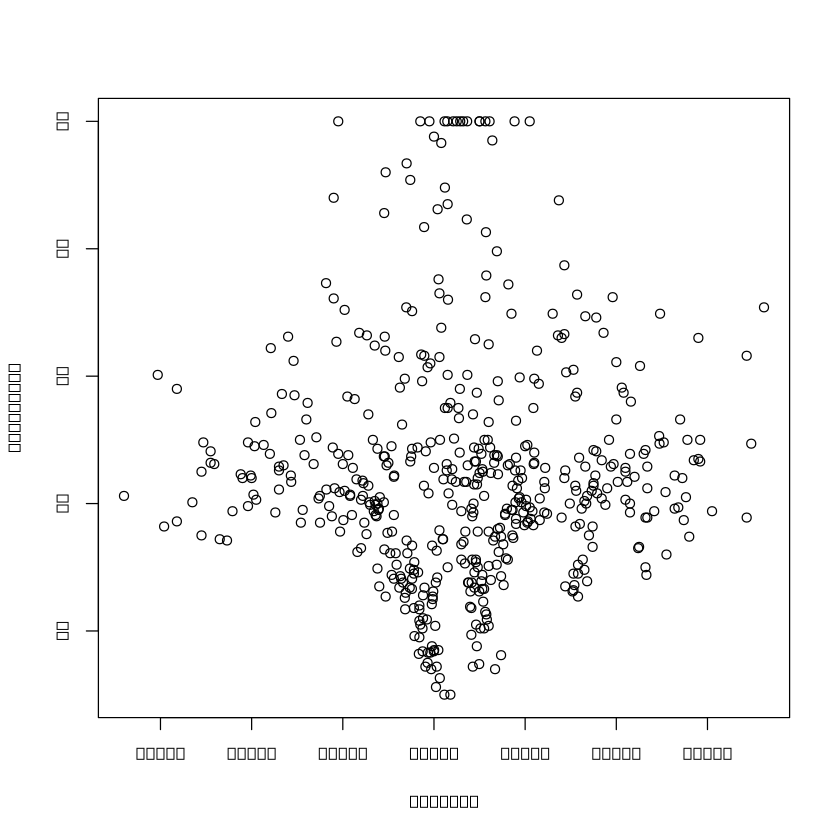

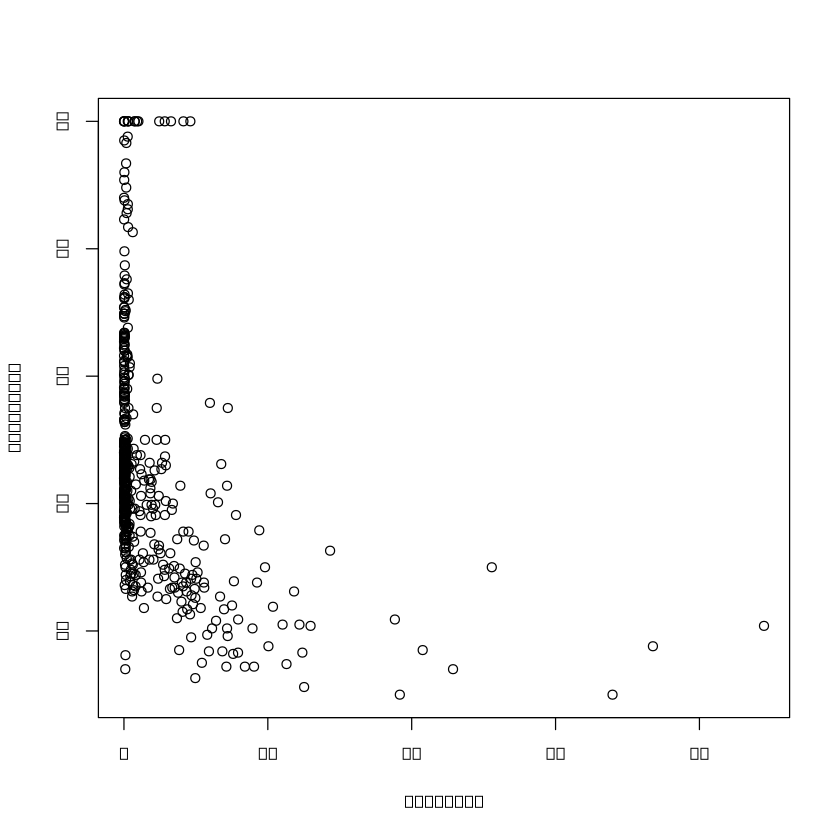

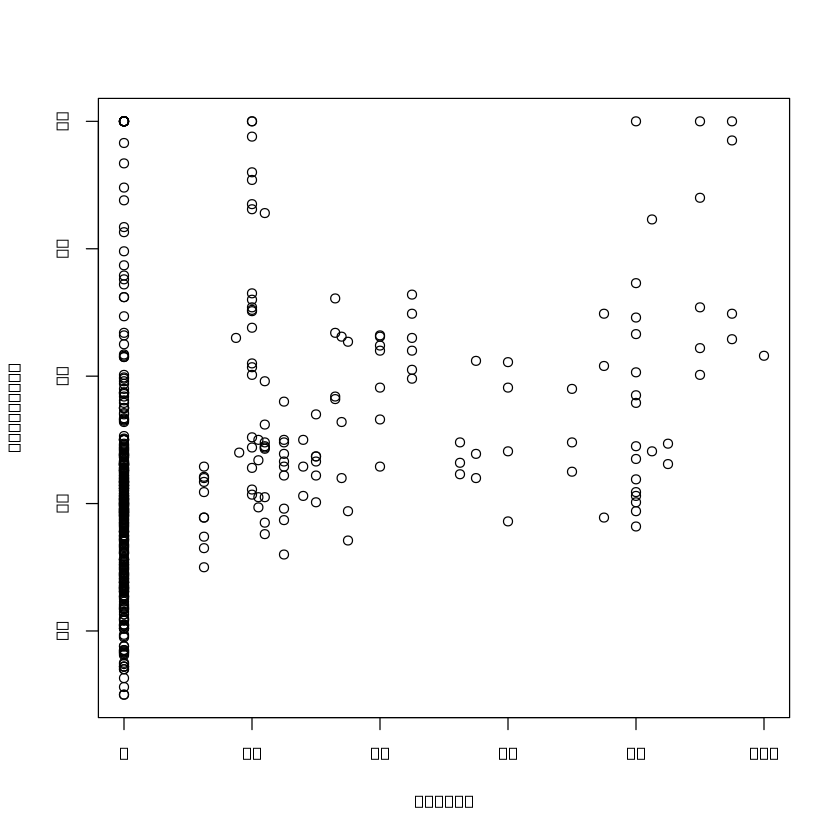

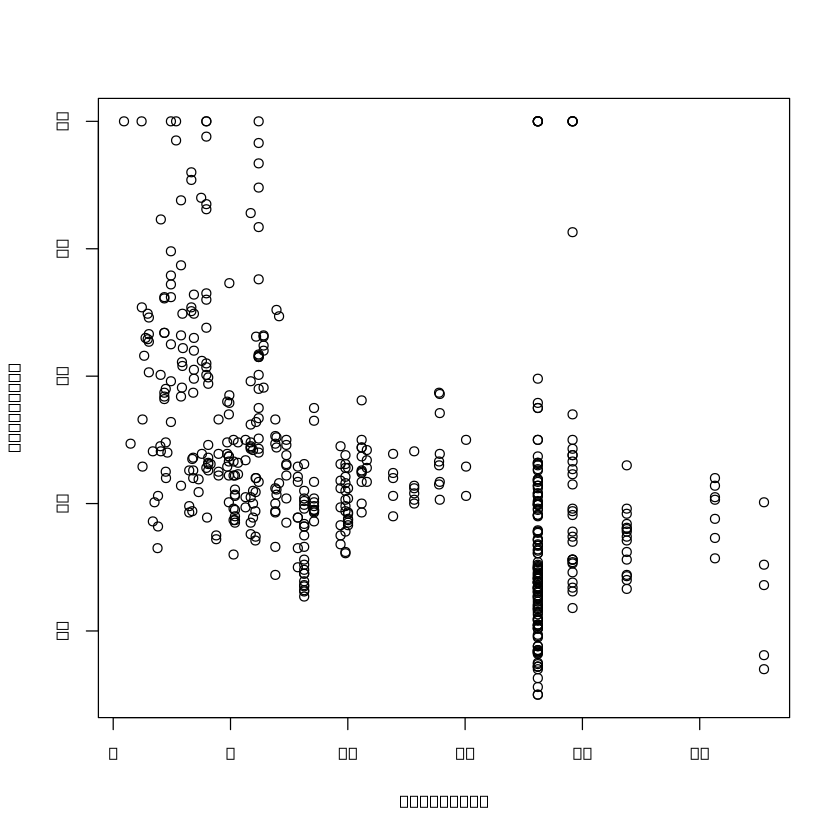

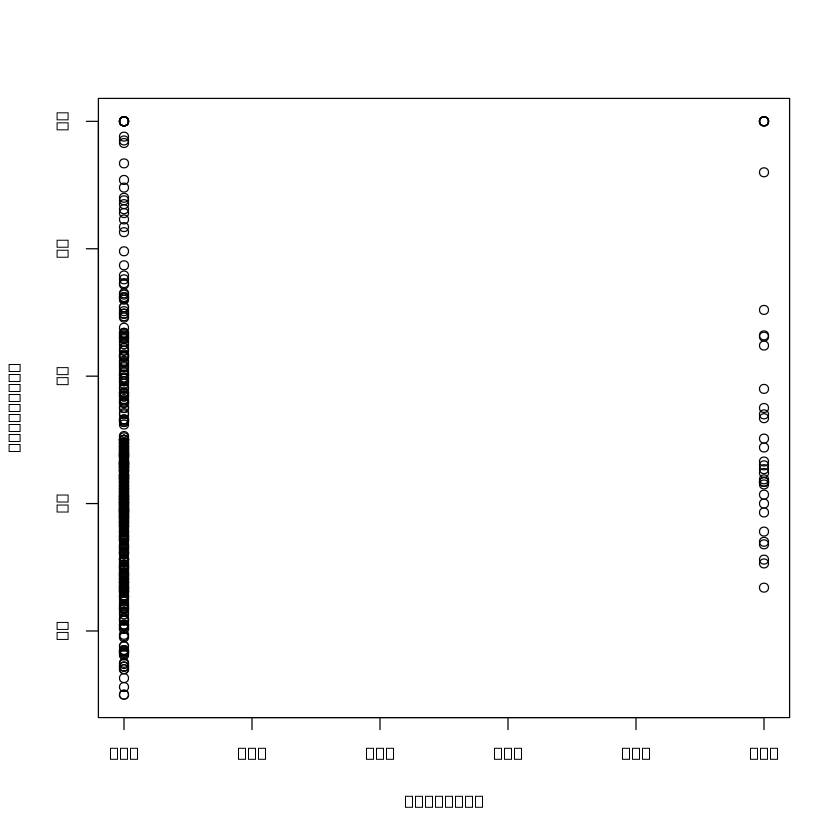

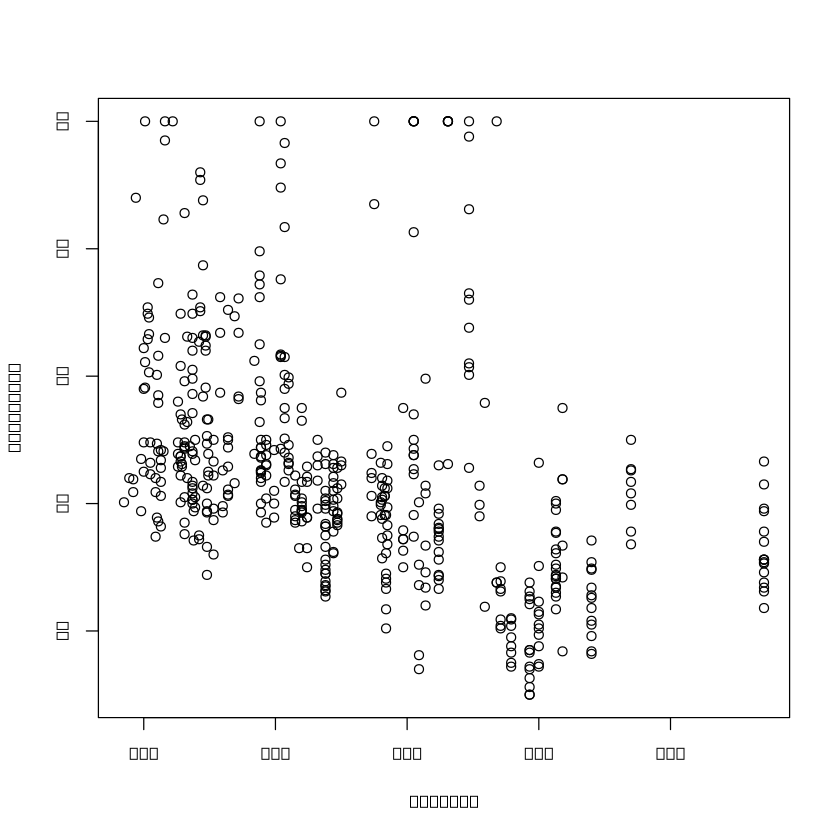

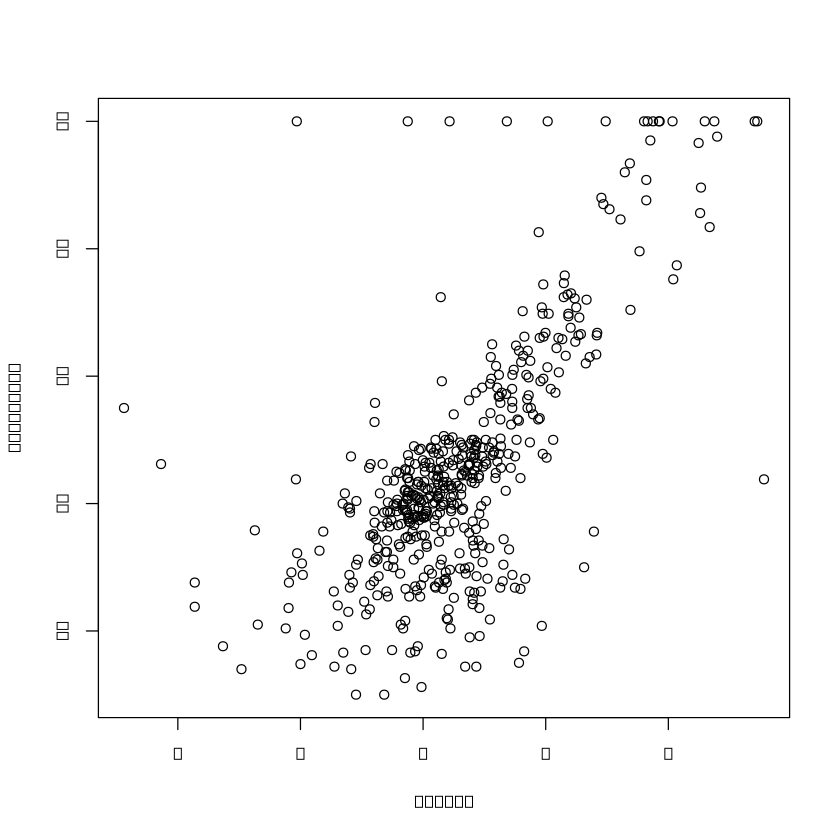

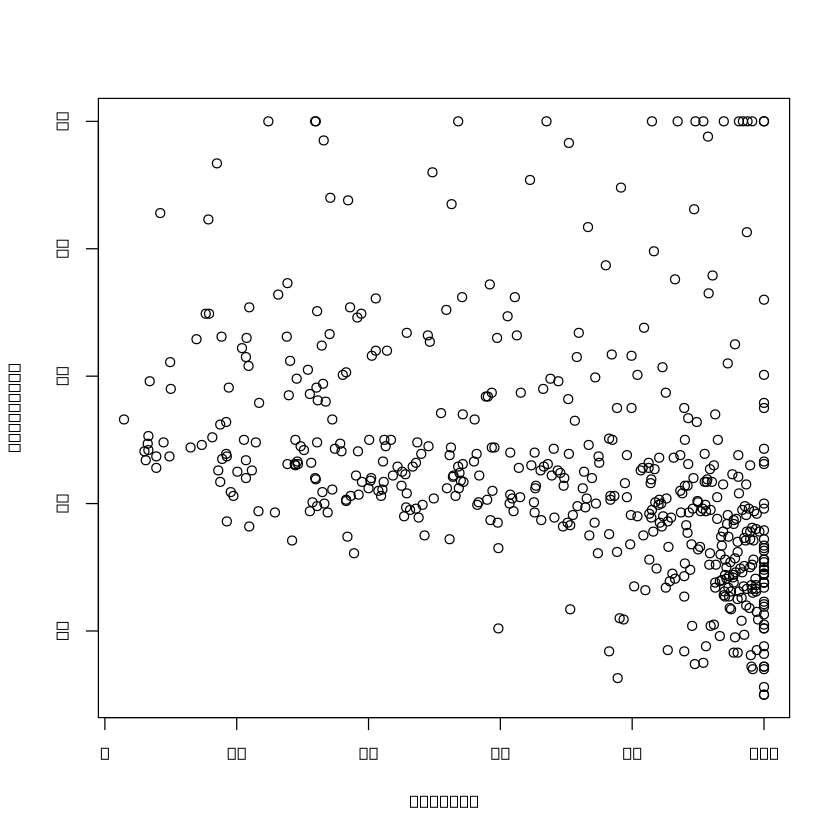

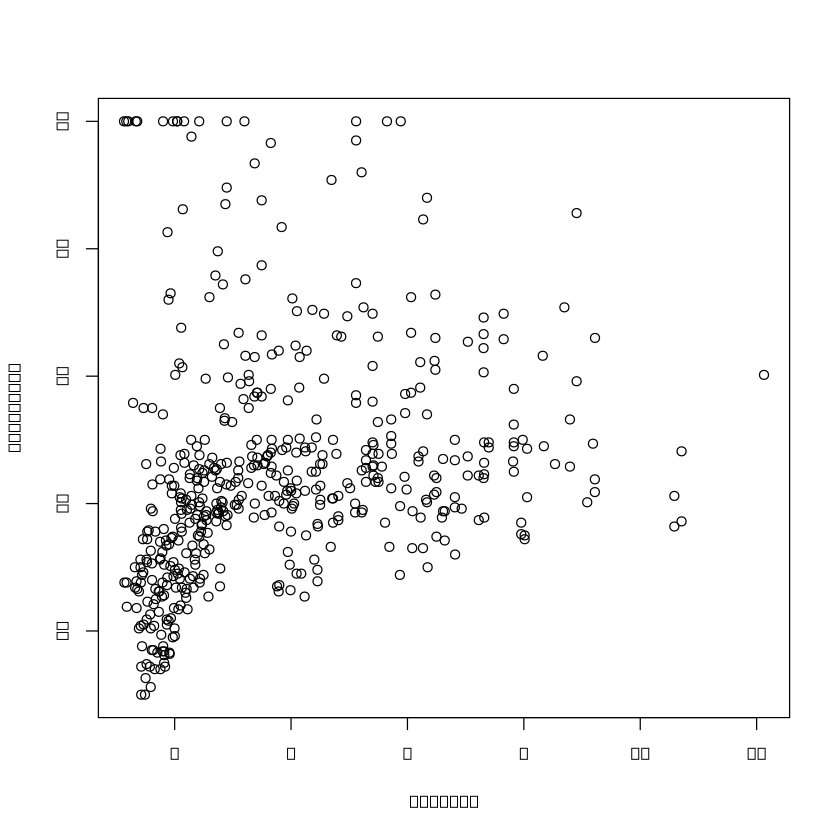

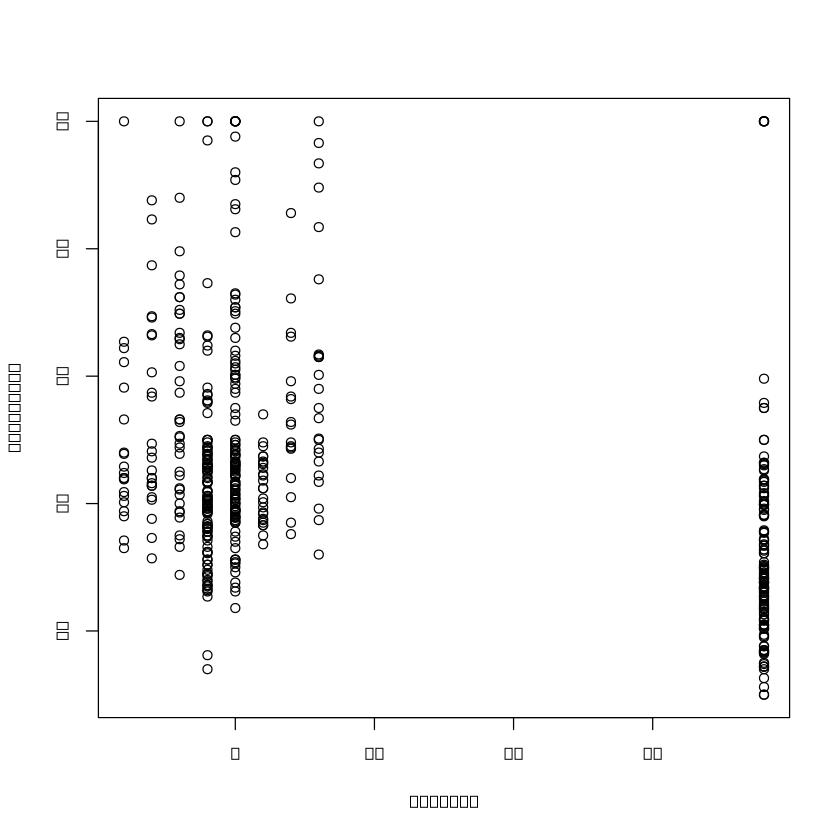

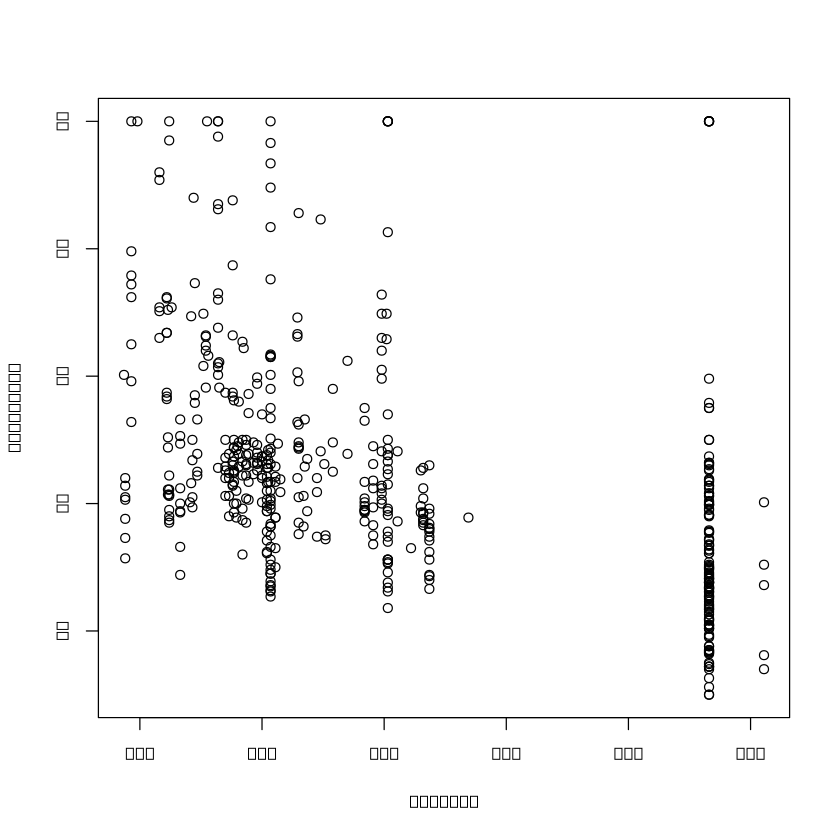

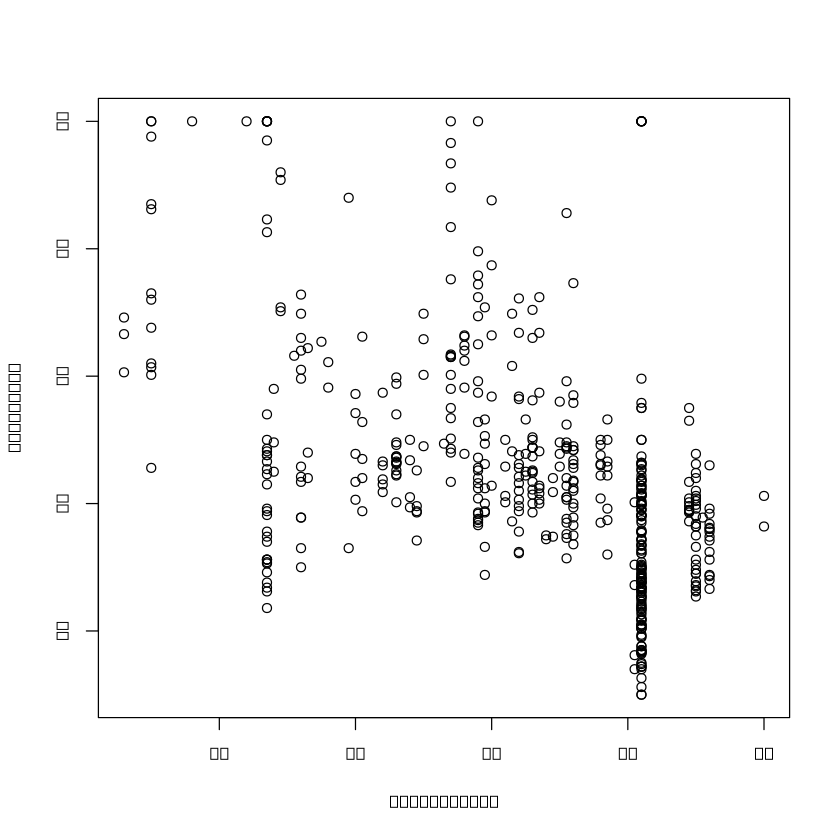

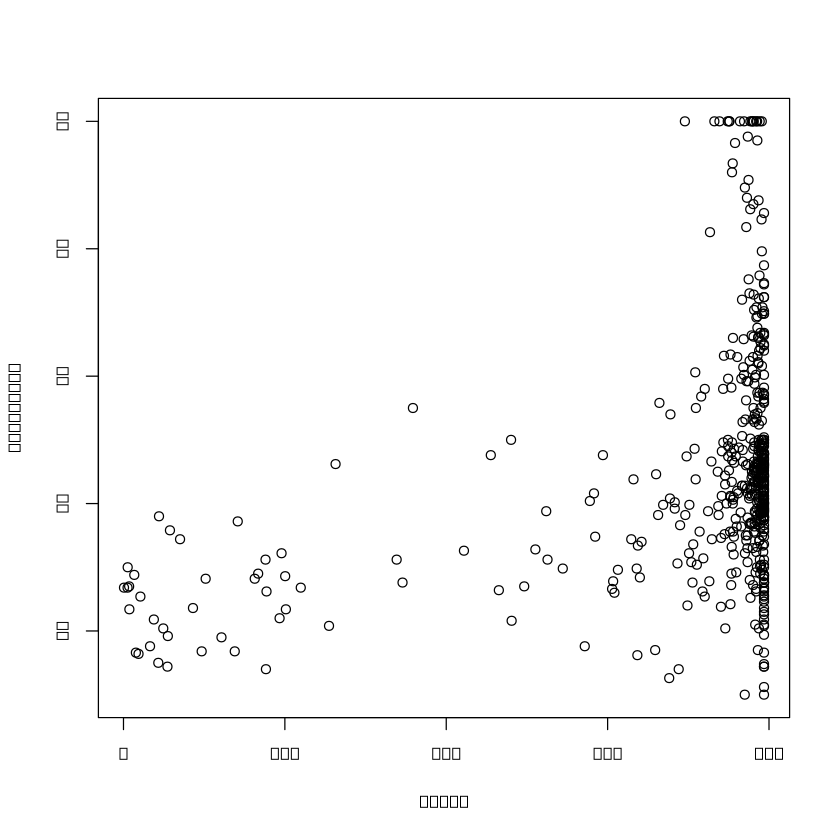

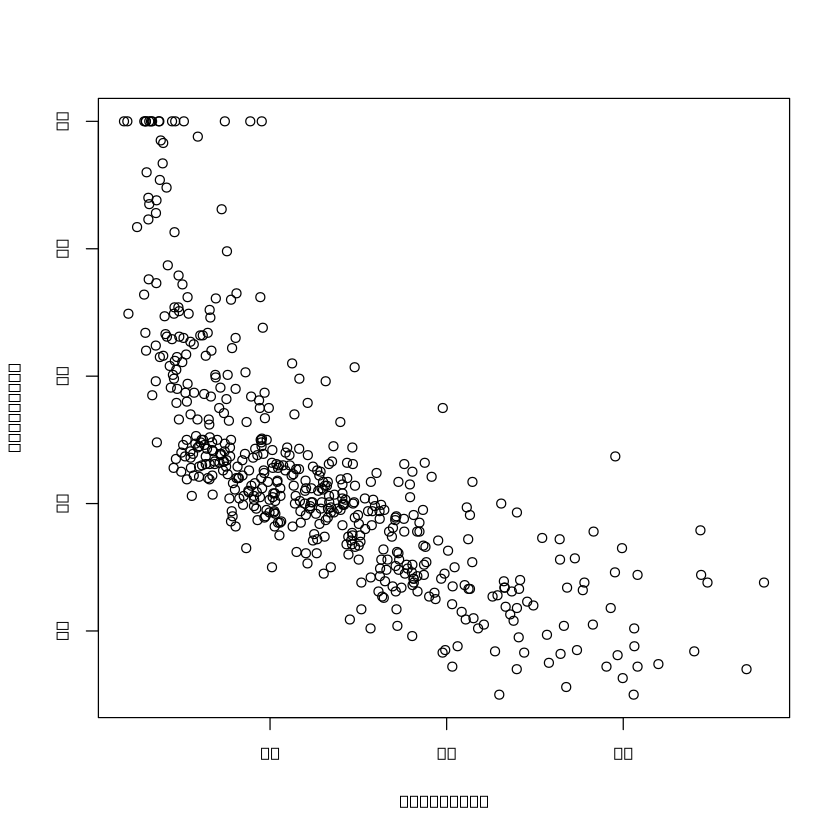

In [36]:
#Exploratory data analysis
plot(dat$TRACT, dat$CMEDV) #positive linear, new houses more expensive?
plot(dat$LON, dat$CMEDV) #slight neg?
plot(dat$LAT, dat$CMEDV) #no relationship
plot(dat$CRIM, dat$CMEDV) #exponential
plot(dat$ZN, dat$CMEDV) #no relationship
plot(dat$INDUS, dat$CMEDV) #slight neg?
plot(dat$CHAS, dat$CMEDV) #most house not around river, NO INTERACTION
plot(dat$NOX, dat$CMEDV) #neg
plot(dat$RM, dat$CMEDV)# strong pos
plot(dat$AGE, dat$CMEDV) #slight neg
plot(dat$DIS, dat$CMEDV) #sqrt relation
plot(dat$RAD, dat$CMEDV) #slight neg, no data between 10-20 rad
plot(dat$TAX, dat$CMEDV) #neg
plot(dat$PTRATIO, dat$CMEDV) #slight neg?
plot(dat$B, dat$CMEDV) #exponential
plot(dat$LSTAT, dat$CMEDV) #strong neg but not linear

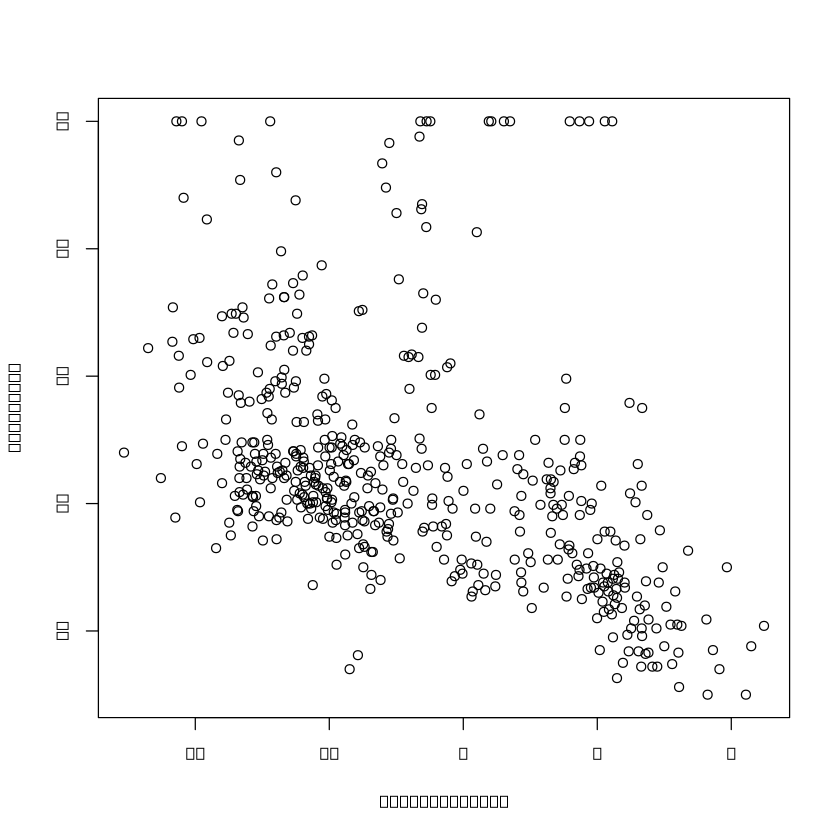

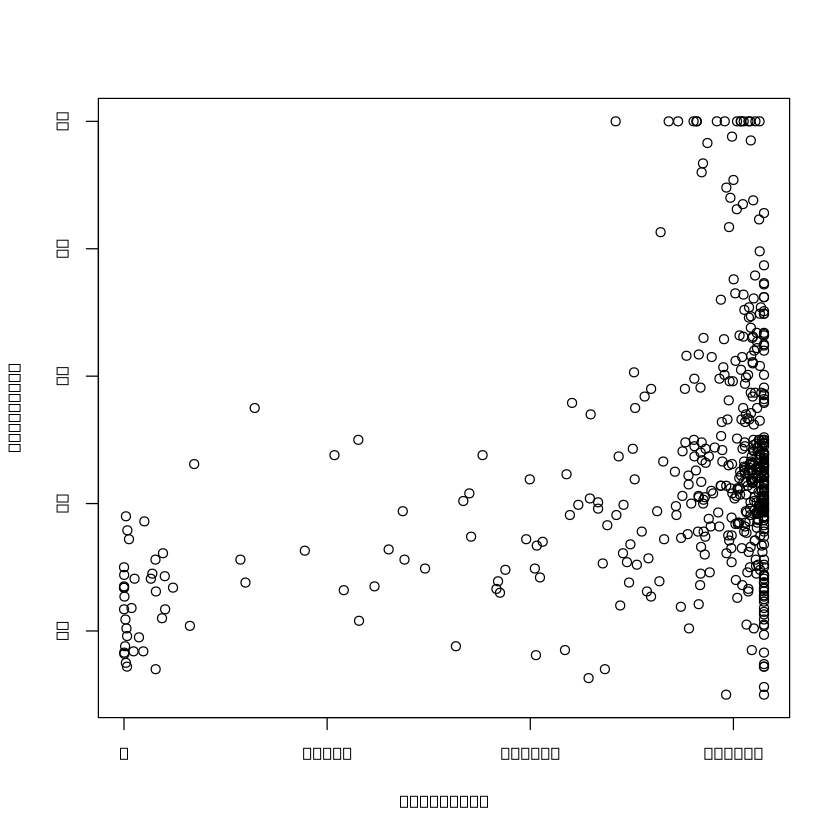

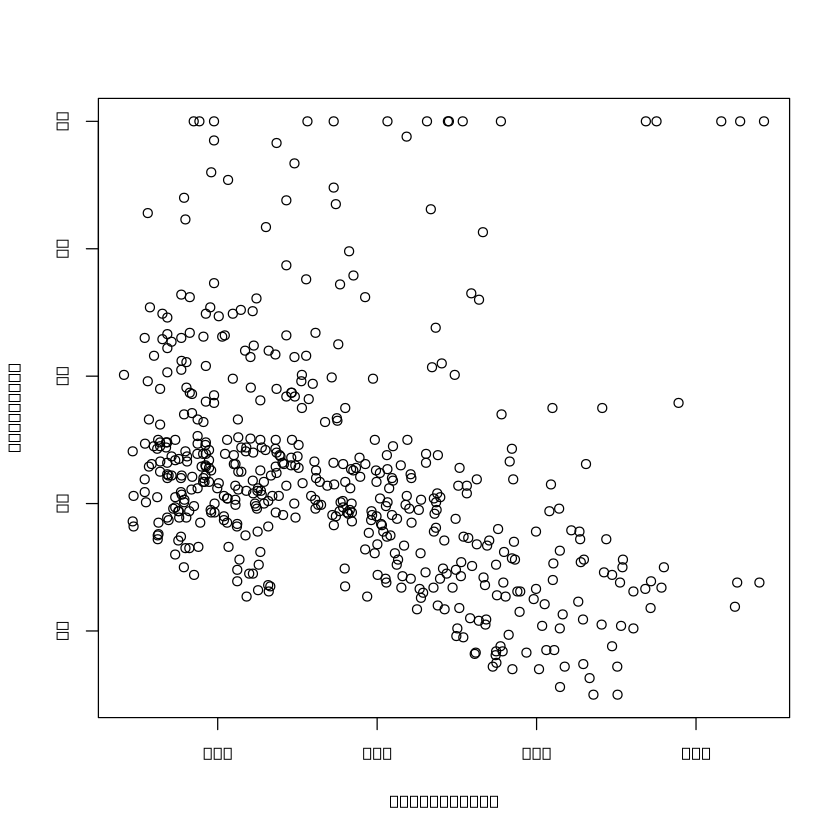

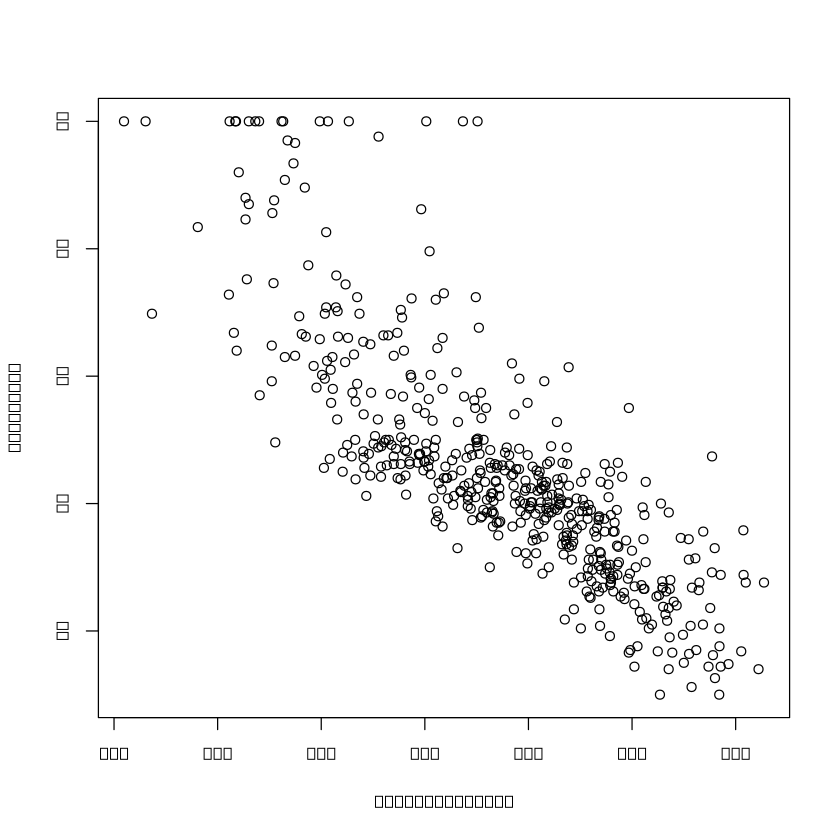

In [37]:
#Transform to make data linear
plot(log(dat$CRIM), dat$CMEDV) #lienar now using log transform
plot((dat$B)^2, dat$CMEDV) #lienar now using squared transform slight positive
plot(1/(dat$DIS), dat$CMEDV) #Neg linear now using inverse
plot(log(dat$LSTAT), dat$CMEDV) #strong linear neg now

In [12]:
#correlation between each variable
cor(data1)

,TOWNNO,TRACT,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
TOWNNO,1.0000000000,-0.45575701,-0.0006267488,-0.631647709,-0.265134492,0.44791970,-0.12396954,0.43442610,-0.009220052,0.42939920,-0.11733424,0.23514100,-0.32728047,0.724060422,0.70798157,0.341110963,-0.30651657,0.29660020
TRACT,-0.4557570088,1.00000000,-0.2208919274,-0.225540594,0.428252165,-0.54716534,0.36729434,-0.57570636,0.041355530,-0.56980825,0.30520745,-0.48746725,0.49684242,-0.828829883,-0.79360272,-0.532679418,0.36504663,-0.52248622
LON,-0.0006267488,-0.22089193,1.0000000000,0.143053589,-0.322946685,0.06510061,-0.21808107,0.06270245,-0.175619445,0.16087125,-0.25711003,0.20473895,-0.01124313,0.034066937,0.05066257,0.312602186,-0.01829986,0.19562959
LAT,-0.6316477088,-0.22554059,0.1430535891,1.000000000,0.006825792,-0.08429296,-0.12966739,-0.04109348,-0.044726433,-0.06860040,-0.06931699,0.07903522,-0.08298085,-0.207012846,-0.16771805,-0.004527081,0.10525370,0.04565955
CMEDV,-0.2651344917,0.42825216,-0.3229466851,0.006825792,1.000000000,-0.38958244,0.36038618,-0.48475438,0.175662571,-0.42930022,0.69630379,-0.37799890,0.24931483,-0.384765552,-0.47197881,-0.505654619,0.33486083,-0.74083599
CRIM,0.4479196971,-0.54716534,0.0651006133,-0.084292955,-0.389582441,1.00000000,-0.20046922,0.40658341,-0.055891582,0.42097171,-0.21924670,0.35273425,-0.37967009,0.625505145,0.58276431,0.289945579,-0.38506394,0.45562148
ZN,-0.1239695438,0.36729434,-0.2180810717,-0.129667394,0.360386177,-0.20046922,1.00000000,-0.53382819,-0.042696719,-0.51660371,0.31199059,-0.56953734,0.66440822,-0.311947826,-0.31456332,-0.391678548,0.17552032,-0.41299457
INDUS,0.4344260977,-0.57570636,0.0627024525,-0.041093480,-0.484754379,0.40658341,-0.53382819,1.00000000,0.062938027,0.76365145,-0.39167585,0.64477851,-0.70802699,0.595129275,0.72076018,0.383247556,-0.35697654,0.60379972
CHAS,-0.0092200518,0.04135553,-0.1756194453,-0.044726433,0.175662571,-0.05589158,-0.04269672,0.06293803,1.000000000,0.09120281,0.09125123,0.08651777,-0.09917578,-0.007368241,-0.03558652,-0.121515174,0.04878848,-0.05392930
NOX,0.4293991967,-0.56980825,0.1608712500,-0.068600401,-0.429300219,0.42097171,-0.51660371,0.76365145,0.091202807,1.00000000,-0.30218819,0.73147010,-0.76923011,0.611440563,0.66802320,0.188932677,-0.38005064,0.59087892


In [44]:
#Model building

#Initial model with all covariates
m0<-lm(CMEDV~., data = data1)
summary(m0)


Call:
lm(formula = CMEDV ~ ., data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.0678  -2.7157  -0.5614   1.6559  25.6815 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.591e+02  4.132e+02  -0.385 0.700464    
TOWNNO      -7.162e-03  1.817e-02  -0.394 0.693633    
TRACT       -7.425e-04  4.578e-04  -1.622 0.105461    
LON         -4.983e+00  3.487e+00  -1.429 0.153619    
LAT         -3.700e+00  7.547e+00  -0.490 0.624178    
CRIM        -1.048e-01  3.260e-02  -3.216 0.001388 ** 
ZN           4.507e-02  1.387e-02   3.249 0.001240 ** 
INDUS        1.322e-02  6.179e-02   0.214 0.830639    
CHAS         2.519e+00  8.653e-01   2.911 0.003770 ** 
NOX         -1.652e+01  4.042e+00  -4.086 5.13e-05 ***
RM           3.801e+00  4.177e-01   9.100  < 2e-16 ***
AGE          1.582e-03  1.361e-02   0.116 0.907508    
DIS         -1.426e+00  2.193e-01  -6.505 1.93e-10 ***
RAD          2.264e-01  8.419e-02   2.689 0.007402 ** 
TAX        

In [40]:
#pick varaibles have strong correlation with CMEDV 
m1<-lm(CMEDV~TRACT+TOWNNO+RM+INDUS+NOX+LSTAT+PTRATIO+TAX, data=dat)
summary(m1)


Call:
lm(formula = CMEDV ~ TRACT + TOWNNO + RM + INDUS + NOX + LSTAT + 
    PTRATIO + TAX, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.8317  -2.9781  -0.8004   1.9208  29.1460 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.9375392  5.0636721   5.715 1.90e-08 ***
TRACT       -0.0011086  0.0003054  -3.630 0.000313 ***
TOWNNO       0.0164561  0.0124679   1.320 0.187483    
RM           4.5940565  0.4252945  10.802  < 2e-16 ***
INDUS        0.1335359  0.0613904   2.175 0.030087 *  
NOX         -5.6001887  3.4794776  -1.609 0.108144    
LSTAT       -0.5640959  0.0500525 -11.270  < 2e-16 ***
PTRATIO     -1.0685152  0.1380607  -7.739 5.62e-14 ***
TAX         -0.0112491  0.0033858  -3.322 0.000958 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.136 on 497 degrees of freedom
Multiple R-squared:  0.6921,	Adjusted R-squared:  0.6872 
F-statistic: 139.7 on 8 and 497 DF,  p-value

In [41]:
m2<-lm(CMEDV~log(CRIM)+RM+INDUS+NOX+log(LSTAT)+
         TAX+I(1/DIS)+I(B^2), data=dat)
summary(m2)


Call:
lm(formula = CMEDV ~ log(CRIM) + RM + INDUS + NOX + log(LSTAT) + 
    TAX + I(1/DIS) + I(B^2), data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1714  -2.6512  -0.4177   2.2034  21.0333 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.559e+01  3.931e+00   6.510 1.84e-10 ***
log(CRIM)    2.985e-01  2.102e-01   1.420  0.15617    
RM           3.652e+00  3.880e-01   9.413  < 2e-16 ***
INDUS       -6.819e-02  5.361e-02  -1.272  0.20394    
NOX         -1.129e+01  3.583e+00  -3.151  0.00172 ** 
log(LSTAT)  -9.608e+00  5.473e-01 -17.555  < 2e-16 ***
TAX         -1.071e-02  2.233e-03  -4.799 2.11e-06 ***
I(1/DIS)     1.866e+01  2.147e+00   8.693  < 2e-16 ***
I(B^2)       1.377e-05  5.586e-06   2.466  0.01402 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.477 on 497 degrees of freedom
Multiple R-squared:  0.766,	Adjusted R-squared:  0.7622 
F-statistic: 203.4 on 8 and 497 DF,

In [42]:
m3<-lm(CMEDV~log(CRIM)+RM+NOX+log(LSTAT)+LON+PTRATIO+
         TAX+I(1/DIS)+I(B^2), data=dat)
summary(m3)


Call:
lm(formula = CMEDV ~ log(CRIM) + RM + NOX + log(LSTAT) + LON + 
    PTRATIO + TAX + I(1/DIS) + I(B^2), data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5747  -2.3718  -0.3283   2.0315  22.2154 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.673e+02  2.013e+02  -2.818  0.00502 ** 
log(CRIM)    4.145e-01  2.030e-01   2.041  0.04176 *  
RM           3.270e+00  3.737e-01   8.750  < 2e-16 ***
NOX         -1.471e+01  3.519e+00  -4.181 3.44e-05 ***
log(LSTAT)  -9.050e+00  5.281e-01 -17.139  < 2e-16 ***
LON         -8.520e+00  2.821e+00  -3.020  0.00266 ** 
PTRATIO     -5.861e-01  1.145e-01  -5.118 4.43e-07 ***
TAX         -8.560e-03  2.137e-03  -4.006 7.13e-05 ***
I(1/DIS)     1.679e+01  1.992e+00   8.427 3.86e-16 ***
I(B^2)       1.700e-05  5.353e-06   3.176  0.00158 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.276 on 496 degrees of freedom
Multiple R-squared:  0.787,	A

In [43]:
m4<-lm(CMEDV~log(CRIM)+RM+INDUS+log(LSTAT)+LON+PTRATIO+
         TAX+I(1/DIS)+I(B^2), data=dat)
summary(m4)


Call:
lm(formula = CMEDV ~ log(CRIM) + RM + INDUS + log(LSTAT) + LON + 
    PTRATIO + TAX + I(1/DIS) + I(B^2), data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0169  -2.4301  -0.3324   1.9402  23.0723 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.225e+02  1.979e+02  -4.155 3.83e-05 ***
log(CRIM)    1.606e-01  1.952e-01   0.823 0.411058    
RM           3.109e+00  3.794e-01   8.196 2.14e-15 ***
INDUS       -1.044e-01  5.078e-02  -2.056 0.040322 *  
log(LSTAT)  -9.311e+00  5.307e-01 -17.543  < 2e-16 ***
LON         -1.200e+01  2.780e+00  -4.316 1.92e-05 ***
PTRATIO     -4.207e-01  1.119e-01  -3.760 0.000191 ***
TAX         -8.177e-03  2.227e-03  -3.671 0.000268 ***
I(1/DIS)     1.399e+01  1.892e+00   7.395 6.09e-13 ***
I(B^2)       1.747e-05  5.423e-06   3.222 0.001357 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.332 on 496 degrees of freedom
Multiple R-squared:  0.7813

In [47]:
m5<-lm(CMEDV~log(CRIM)+RM+INDUS+log(LSTAT)+LON+PTRATIO+NOX+CHAS+
         TAX+I(1/DIS)+I(B^2), data=dat)
summary(m5)


Call:
lm(formula = CMEDV ~ log(CRIM) + RM + INDUS + log(LSTAT) + LON + 
    PTRATIO + NOX + CHAS + TAX + I(1/DIS) + I(B^2), data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1164  -2.2846  -0.2246   1.9465  21.4864 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.981e+02  2.054e+02  -2.426 0.015644 *  
log(CRIM)    3.800e-01  2.019e-01   1.882 0.060424 .  
RM           3.212e+00  3.730e-01   8.612  < 2e-16 ***
INDUS       -5.468e-02  5.236e-02  -1.044 0.296925    
log(LSTAT)  -8.897e+00  5.269e-01 -16.887  < 2e-16 ***
LON         -7.540e+00  2.877e+00  -2.621 0.009050 ** 
PTRATIO     -5.608e-01  1.162e-01  -4.828 1.84e-06 ***
NOX         -1.490e+01  3.687e+00  -4.041 6.17e-05 ***
CHAS         2.398e+00  7.760e-01   3.090 0.002115 ** 
TAX         -7.343e-03  2.195e-03  -3.345 0.000885 ***
I(1/DIS)     1.725e+01  2.044e+00   8.440 3.54e-16 ***
I(B^2)       1.591e-05  5.320e-06   2.990 0.002933 ** 
---
Signif. codes:  0 ‘***’ 0

Introduction

The dataset has 